# Cross-selling di polizze assicurative <br> Master in Data Science - Profession AI <br> Virginio Cocciaglia


## Descrizione del progetto e obiettivi del modello

Il cliente, **AssurePredict**, è una compagnia di assicurazioni leader nel settore, specializzata nell'offrire soluzioni innovative per la gestione del rischio. Questo progetto mira a creare un modello predittivo in grado di individuare potenziali opportunità di cross-selling per clienti esistenti, identificando quelli che potrebbero essere interessati ad acquistare una polizza aggiuntiva per il loro veicolo.

L'obiettivo è quindi sviluppare un **modello di machine learning** che preveda se i clienti, che attualmente hanno un'assicurazione sanitaria, potrebbero essere interessati a sottoscrivere una polizza assicurativa per il loro veicolo. Il modello aiuterà AssurePredict a migliorare l'efficacia delle proprie strategie di cross-selling e ad aumentare la penetrazione nel mercato ottenendo i seguenti vantaggi:
- **Aumento del tasso di conversione** nelle vendite di polizze auto.
- **Ottimizzazione delle campagne di marketing**, indirizzando le offerte a clienti più propensi ad acquistare.
- **Riduzione dei costi** legati a campagne di marketing inefficaci, grazie alla targettizzazione precisa.

## Dataset disponibile

Il dataset a disposizione è composto dalle seguenti caratteristiche:
- **id**: id univoco dell'acquirente.
- **Gender**: sesso dell'acquirente.
- **Age**: età dell'acquirente.
- **Driving_License**: 1 se l'utente ha la patente di guida, 0 altrimenti.
- **Region_Code**: codice univoco della regione dell'acquirente.
- **Previously_Insured**: 1 se l'utente ha già un veicolo assicurato, 0 altrimenti.
- **Vehicle_Age**: età del veicolo.
- **Vehicle_Damage**: Yes se l'utente ha danneggiato il veicolo in passato, No altrimenti.
- **Annual_Premium**: la cifra che l'utente deve pagare come premio durante l'anno.
- **Policy_Sales_Channel**: codice anonimizzato del canale utilizzato per la proposta (es. per email, per telefono, di persona, ecc...).
- **Vintage**: numero di giorni dalla quale l'utente è cliente dell'azienda.
- **Response**: 1 se l'acquirente ha risposto positivamente alla proposta di vendità, 0 altrimenti.

L'obiettivo del modello è prevedere il valore di *Response*.

È importante ricordare di fare attenzione alla distribuzione delle classi del target. In caso di classi sbilanciate si potrà provare a:
- Penalizzare la classe più frequente (argomento *class_weight*).
- Utilizzare l'oversampling o l'undersampling.


## Scelta della tipologia di modello di Machine Learnig

L'obiettivo del modello è, dunque, quello di prevedere il valore della variabile qualitativa nominale binaria ***Response***. Inanzitutto, si può affermare che per risolvere il problema è necessario utilizzare tecniche di **apprendimento supervisionato** avendo a disposizione sia dati di input che di output (labels). In secondo luogo, la tecnica di apprendimento supervisionato appropriata è la **classificazione binaria**: l'obiettivo della previsione è, infatti, trovare a quale delle due classi del target *Response* appartiene l'acquirente: 1 se risponde positivametne alla proposta di vendità, 0 altrimenti.  

## Importazione delle librerie

Vengono innanzitutto importate tutte le librerie necessarie allo sviluppo del modello.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler

## Importazione e analisi descrittiva del dataset

Viene importato con pandas il dataset "insurance_cross_sell.csv" presente nella repository GitHub, impostando l'id univoco dell'acquirente come indice del dataframe. Successivamente si procede ad effettuare un'analisi descrittiva del dataset.

In [2]:
CSV_URL = "https://raw.githubusercontent.com/VirginioC/cross-selling-di-polizze-assicurative/main/insurance_cross_sell.csv"

df = pd.read_csv(CSV_URL, index_col=0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.shape

(381109, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


Il dataset è costituito da **381109 samples** di **10 features** più il **target** ***Response***, non essendo presenti valori mancanti.

### Variabili quantitative

Le features *Age*, *Annual Premium* e *Vintage* sono variabili quantitative continue (float64 e int64). Di seguito vengono analizzate attraverso i principali indici di posizione e variabilità e tramite la costruzione di boxplot prendendo in considerazione la variabile target *Response* (variabile qualitativa dummy).

In [ ]:
df[["Age", "Annual_Premium", "Vintage"]].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


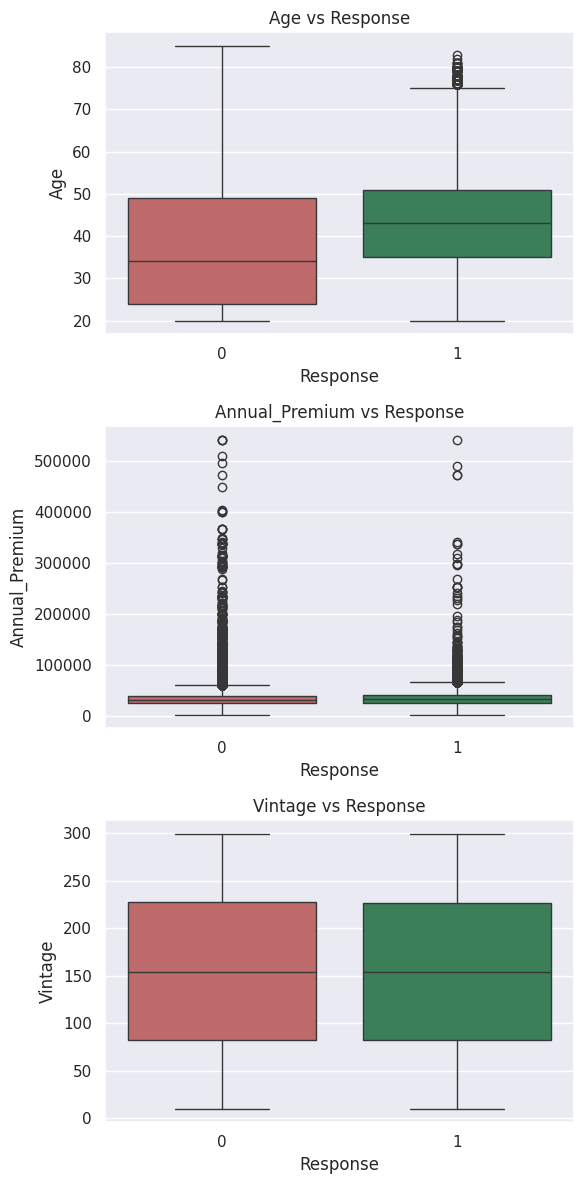

In [ ]:
sns.set_theme(palette="dark")

fig, axes = plt.subplots(3, 1, figsize=(6, 12))

var = ["Age", "Annual_Premium", "Vintage"]

for i, var in enumerate(var):
    sns.boxplot(x="Response",
                y=var,
                data=df,
                hue="Response",
                palette=["indianred", "seagreen"],
                legend=False,
                ax=axes[i])
    axes[i].set_title(f"{var} vs Response")

plt.tight_layout()
plt.show()

Dai boxplot ottenuti si evince che il target *Response* è influenzato dalla feature *Age*: più è alta l'età del cliente più è positiva la risposta alla proposta di vendita (*Response* = 1). Le features *Annual_Premium* e *Vintage*, invece, sembrano non influenzare il target essendo i boxplot quasi identici sia nel caso di risposta positiva (*Response* = 1) che negativa (*Response* = 0).

### Variabili qualitative

Le features *Driving License* e *Previously_Insured* e il target *Response* sono variabili dummy: variabili qualitative nominali binarie codificate per assumere il valore 0 o 1 (int64). Anche le features *Gender* e *Vehicle_Damage* sono variabili qualitative nominali binarie ma non sono codificate e sono pertanto delle stringhe (object). Infine, le features *Region Code* e *Policy_Sales_Channel* sono delle variabili qualitative nominali espresse tramite codici numerici (float64) e la feature *Vehicle_Age* è una variabile qualitativa ordinata con tre classi (object). Di seguito vengono ricavate le frequenze delle diverse classi delle precedenti variabili.

In [ ]:
response_counts = df["Response"].value_counts()
response_perc = (df["Response"].value_counts(normalize=True)*100).round(2)
response_df = pd.DataFrame({"Counts": response_counts,
                            "Percentages": response_perc})
response_df.index.name = "Response"
print(response_df)

print("----------------------------------------")

license_counts = df["Driving_License"].value_counts()
license_perc = (df["Driving_License"].value_counts(normalize=True)*100).round(2)
license_df = pd.DataFrame({"Counts": license_counts,
                           "Percentages": license_perc})
license_df.index.name = "Driving_License"
print(license_df)

print("----------------------------------------")

insured_counts = df["Previously_Insured"].value_counts()
insured_perc = (df["Previously_Insured"].value_counts(normalize=True)*100).round(2)
insured_df = pd.DataFrame({"Counts": insured_counts,
                           "Percentages": insured_perc})
insured_df.index.name = "Previously_Insured"
print(insured_df)

print("----------------------------------------")

gender_counts = df["Gender"].value_counts()
gender_perc = (df["Gender"].value_counts(normalize=True)*100).round(2)
gender_df = pd.DataFrame({"Counts": gender_counts,
                          "Percentages": gender_perc})
gender_df.index.name = "Gender"
print(gender_df)

print("----------------------------------------")

damage_counts = df["Vehicle_Damage"].value_counts()
damage_perc = (df["Vehicle_Damage"].value_counts(normalize=True)*100).round(2)
damage_df = pd.DataFrame({"Counts": gender_counts,
                          "Percentages": gender_perc})
damage_df.index.name = "Vehicle_Damage"
print(damage_df)

print("----------------------------------------")

vehi_age_counts = df["Vehicle_Age"].value_counts()
vehi_age_perc = (df["Vehicle_Age"].value_counts(normalize=True)*100).round(2)
vehi_age_df = pd.DataFrame({"Counts": vehi_age_counts,
                            "Percentages": vehi_age_perc})
vehi_age_df.index.name = "Vehicle_Age"
print(vehi_age_df)

print("----------------------------------------")

print("Region_Code")
region_code_min = df["Region_Code"].min()
region_code_max = df["Region_Code"].max()
region_code_num_classes = df["Region_Code"].nunique()
region_code_df = pd.DataFrame({"Min": [region_code_min],
                               "Max": [region_code_max],
                               "num_classes": [region_code_num_classes]})
print(region_code_df.to_string(index=False))

print("\nMost frequent regional codes")
print(df["Region_Code"].value_counts().head(3))

print("\nLess frequent region codes")
print(df["Region_Code"].value_counts().tail(3))

print("----------------------------------------")

print("Policy_Sales_Channel")
sales_channel_min = df["Policy_Sales_Channel"].min()
sales_channel_max = df["Policy_Sales_Channel"].max()
sales_channel_num_classes = df["Policy_Sales_Channel"].nunique()
sales_channel_df = pd.DataFrame({"Min": [sales_channel_min],
                               "Max": [sales_channel_max],
                               "num_classes": [sales_channel_num_classes]})
print(sales_channel_df.to_string(index=False))

print("\nMost frequent policy sales channel")
print(df["Policy_Sales_Channel"].value_counts().head(3))

print("\nLess frequent policy sales channel")
print(df["Policy_Sales_Channel"].value_counts().tail(3))

          Counts  Percentages
Response                     
0         334399        87.74
1          46710        12.26
----------------------------------------
                 Counts  Percentages
Driving_License                     
1                380297        99.79
0                   812         0.21
----------------------------------------
                    Counts  Percentages
Previously_Insured                     
0                   206481        54.18
1                   174628        45.82
----------------------------------------
        Counts  Percentages
Gender                     
Male    206089        54.08
Female  175020        45.92
----------------------------------------
                Counts  Percentages
Vehicle_Damage                     
Male            206089        54.08
Female          175020        45.92
----------------------------------------
             Counts  Percentages
Vehicle_Age                     
1-2 Year     200316        52.56
< 1 Year    

Il target *Response* è una variabile con due classi sbilanciate, infatti, l'87.74 % dei samples ricadono nella classe negativa (*Response* = 0) e il 12.26 % nella classe positiva (*Response* = 1). Allo stesso modo la feature *Driving_License* è sbilanciata, e in questo caso in maniera ancora più estrema: il 99.79 % degli acquirenti presenti nel dataset ha la patente di guida. Le features *Previously_Insured*, *Gender* e *Vehicle_Damage*, invece, hanno classi bilanciate: una classe con circa il 54 % dei samples e l'altra con il 46 % in tutti e tre i casi. Infine, La feature trimodale *Vehicle_Age* ha due classi distribuite in maniera equa ("1-2 Year" 52.56 % e "< 1 Year" 43.24 %) e una classe con molti meno samples ("> 2 Years" 4.20 %).
Per quanto riguarda le features *Region_Code* e *Policy_Sales_Channel*, invece, essendo variabili qualitative nominali espresse tramite codici numerici con numerose modalità, sono state in primo luogo ricavate delle statistiche sul range di variazione dei codici, e in secondo luogo sono state ricavate le classi più frequenti e meno frequenti. Dunque, dai risultati ottenuti si evince che i codici univoci regionali presenti nel dataset sono 53, dal codice 0 al codice 52, mentre i codici anonimizzati dei canali utilizzati per la proposta sono 155 e coprono un range che va dal codice numero 1 al numero 163. In entrambi i casi, osservando le classi più frequenti e quelle meno frequenti, si può constatare come ci siano anche in questo caso problemi di bilanciamento.   

Dopo aver aver analizzato le classi delle variabili qualitative e le lore frequenze è possibile costruire dei grafici a barre per mettere a confronto tali features con il target *Response*. Vengono realizzati prima i barplot relativi alle features binarie e a *Vehicle_Age* e successivamente quelli relativi a *Region_Code* e *Policy_Sales_Channel* che presentano numerose modalità.


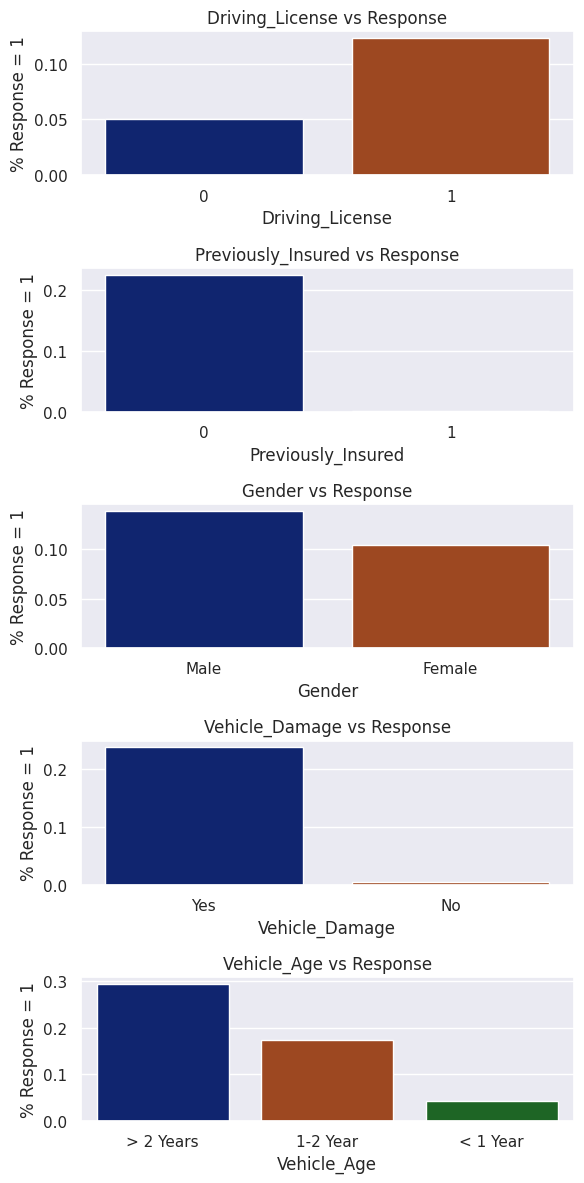

In [ ]:
sns.set_theme(palette="dark")

fig, axes = plt.subplots(5, 1, figsize=(6, 12))

var = ["Driving_License",
       "Previously_Insured",
       "Gender",
       "Vehicle_Damage",
       "Vehicle_Age"]

for i, var in enumerate(var):
    sns.barplot(x=var,
                y="Response",
                data=df,
                hue=var,
                legend=False,
                errorbar=None,
                ax=axes[i])
    axes[i].set_title(f"{var} vs Response")
    axes[i].set_ylabel("% Response = 1")

plt.tight_layout()
plt.show()

I precedenti barplot presentano sull'asse delle x le classi di ciascuna variabile qualitativa e sull'asse delle y la percentuale di risposte positive alla proposta di vendita (*Response* = 1) per classe (in questo modo si rende ininfluente il problema delle classi sbilanciate). Da tali grafici si deduce che:
* La percentuale di acquirenti con la patente di guida che rispondono positivamente alla proposta (circa il 12%) è maggiore rispetto ai non patentati (circa il 5%).  
* Soltanto gli acquirenti che non hanno già un veicolo assicurato rispondono, eventualmente, in maniera positiva alla proposta.
* Gli acquirenti di sesso maschile sembrano dare una risposta positiva alla proposta di vendita con più frequenza rispetto alle donne, anche se la differenza non è troppo marcata.
* Circa il 24 % degli acquirenti che hanno già danneggiato il veicolo in passato rispondono positivamente alla proposta, mentre quasi nessuno di coloro che non hanno danneggiato il veicolo risponde positivamente.
* Più l'età del veicolo è maggiore più aumenta la percentuale di risposte positive.






In modo analogo si procede a costruire i grafici a barre delle variabili *Region_Code* e *Policy_Sales_Channel*.

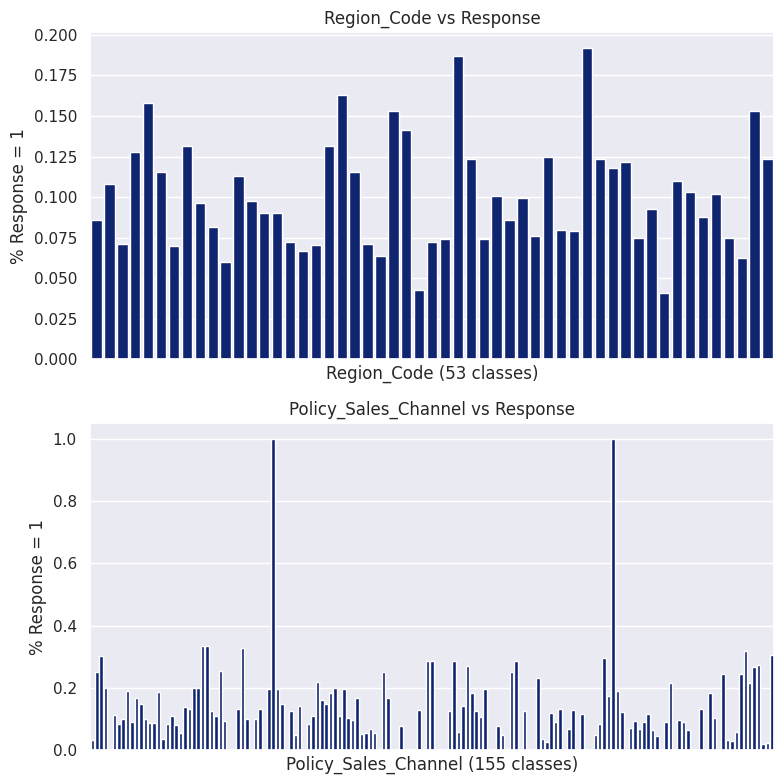

In [ ]:
sns.set_theme(palette="dark")

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

var = ["Region_Code", "Policy_Sales_Channel"]

for i, var in enumerate(var):
    sns.barplot(x=var,
                y="Response",
                data=df,
                legend=False,
                errorbar=None,
                ax=axes[i])
    axes[i].set_xticks([])
    axes[i].set_title(f"{var} vs Response")
    axes[i].set_xlabel(f"{var} ({df[var].nunique()} classes)")
    axes[i].set_ylabel("% Response = 1")

plt.tight_layout()
plt.show()

Per quanto riguarda i codici univoci delle regioni degli acquirenti non sembrano esserci pattern particolari anche se ci sono alcune regioni in cui la percentuale di risposte positive è più elevata rispetto alla maggiorparte. Anche i codici anonimizzati dei canali utilizzati per la proposta non sembrano avere pattern significativi tranne per due codici (numero 43 e 123) in cui la percentuale di risposte positive è del 100 %. Ciò però è probabilmente dovuto all'unicità del canale e può essere verificato di seguito.


In [ ]:
df_43 = df[df["Policy_Sales_Channel"]==43]
print(df_43["Response"].mean())
print((df["Policy_Sales_Channel"]==43).value_counts())

print()

df_123 = df[df["Policy_Sales_Channel"]==123]
print(df_123["Response"].mean())
print((df["Policy_Sales_Channel"]==123).value_counts())

1.0
False    381108
True          1
Name: Policy_Sales_Channel, dtype: int64

1.0
False    381108
True          1
Name: Policy_Sales_Channel, dtype: int64


## Features encoding

Dall'analisi descrittiva del dataset si è visto che sono presenti tre features qualitative costituite da stringhe: *Gender*, *Vehicle_Damage* e *Vehicle_Age*. Per questo motivo, è necessario codificarle rendendole numeriche in modo da poter essere utilizzate per la creazione del modello di classificazione. Viene utilizzato il **label encoding** per tutte e tre le features con la differenza che *Gender* e *Vehicle_Damage*, essendo binarie, vengono trasformate in variabili dummy (0 oppure 1), mentre per la feature *Vehicle_Age* vengono assegnati valori ordinati in base all'età del veicolo. Inoltre, sono presenti nel dataset anche le features *Region_Code* e *Policy_Sales_Channel* che sono variabili qualitative nominali espresse tramite codici numerici e per questo motivo devono essere sottoposte a **one-hot encoding**.  

In [ ]:
size_mapping = {"Male": 1, "Female": 0}
df["Gender"] = df["Gender"].map(size_mapping)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
size_mapping = {"Yes": 1, "No": 0}
df["Vehicle_Damage"] = df["Vehicle_Damage"].map(size_mapping)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [ ]:
size_mapping = {"< 1 Year": 1, "1-2 Year": 2, "> 2 Years": 3}
df["Vehicle_Age"] = df["Vehicle_Age"].map(size_mapping)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [ ]:
df = pd.get_dummies(df, columns=["Region_Code"])
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
id,,,,,,,,,,,,,,,,,,,,,
1,1,44,1,0,3,1,40454.0,26.0,217,1,...,0,0,0,0,0,0,0,0,0,0
2,1,76,1,0,2,0,33536.0,26.0,183,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,1,0,3,1,38294.0,26.0,27,1,...,0,0,0,0,0,0,0,0,0,0
4,1,21,1,1,1,0,28619.0,152.0,203,0,...,0,0,0,0,0,0,0,0,0,0
5,0,29,1,1,1,0,27496.0,152.0,39,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=["Policy_Sales_Channel"])
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
id,,,,,,,,,,,,,,,,,,,,,
1,1,44,1,0,3,1,40454.0,217,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,76,1,0,2,0,33536.0,183,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,1,0,3,1,38294.0,27,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,21,1,1,1,0,28619.0,203,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,29,1,1,1,0,27496.0,39,0,0,...,1,0,0,0,0,0,0,0,0,0


Si osserva come, una volta utilizzato il one-hot encoding per le features *Region_Code* e *Policy_Sales_Channel* la dimensione del dataset aumenta considerevolmente passando da 11 a ben 217 colonne. Questo aumento di dimensioni rende il modello più complesso e il conseguente addestramento richiede maggiori risorse computazionali. Per arginare tale aumento di dimensionalità si potrà in seguito pensare, ad esempio, di raggruppare le modalità in base alla loro frequenza oppure eliminare le features qualora risultassero non necessarie.

## Features selection e scelta dei modelli da costruire e confrontare

Con la precedente analisi descrittiva è risultato che la cifra che l'utente deve pagare come premio durante l'anno (*Annual Premium*) e il numero di giorni dalla quale l'utente è cliente dell'azienda (*Vintage*) non sembrano influenzare la variabile target Response. Si può, inoltre, pensare di escludere anche le features *Region_Code* e *Policy_Sales_Channel* poichè si è visto che non ci sono pattern particolari in relazione al target e che vi è un significativo aumento di dimensionalità dovuto al one-hot-encoding.
Tuttavia, per non rischiare di perdere informazioni importanti per la previsione, si opta per valutare prima il modello con tutte le features e successivamente il modello con le sole features selezionate. Nello specifico, verrano creati due modelli con due tecniche differenti per la gestione delle classi sbilanciate per entrambe le casistiche precedenti (tutte le features e features selezionate): utilizzo del parametro *class_weight="balanced"* e oversampling del dataset. Inoltre, per valutare gli effetti di tali tecniche si partirà col realizzare un modello di base con tutte le features e nessuna tecnica utilizzata per gestire lo sbilanciamento delle classi. Dunque, in sintesi, i modelli che verrano creati e valutati sono i seguenti:
* **Modello 0**: modello con tutte le features e nessuna tecnica utilizzata per gestire lo sbilanciamento delle classi.
* **Modello 1**: modello con tutte le features e utilizzo del parametro *class_weight="balanced"*.
* **Modello 2**: modello con tutte le features e utilizzo della tecnica dell'oversampling.
* **Modello 3**: modello con features selezionate e utilizzo del parametro *class_weight="balanced"*.
* **Modello 4**: modello con features selezionate e utilizzo della tecnica dell'oversampling.

In tutti i casi, il modello che verrà utilizzato è un modello di **Regressione Logistica**, in grado di effettuare la classificazione binaria richiesta.


## Metriche utilizzate per la valutazione dei modelli e loro importanza in base all'obiettivo aziendale

Le metriche che verranno calcolate per valutare la bontà dei modelli di classificazione sono le seguenti:
1. **Precision**: percentuale delle classificazioni positive che sono effettivamente positive ( TP / (TP + FP) ).
2. **Recall**: percentuale delle osservazioni positive che vengono classificate come positive ( TP / (TP + FN) ).
3. **F1-score**: media armonica tra precision e recall ( 2 precision * recall / (precision + recall) ).  
4. **Accuracy**: percentuale di classificazioni corrette. <br>

In particolar modo si vuole avere la percentuale di **recall** più alta possibile per la classe positiva e dunque ridurre al minimo i falsi negativi, questo perchè l'obiettivo dell'azienda è quello di non perdersi nessun potenziale acquirente della polizza anche a costo di una precision e quindi un'accuracy minore. <br>
Una volta trovato il modello che si ritiene essere il migliore, vengono ricavate anche la matrice di confusione che riassume visivamente le performance del modello e la curva ROC con la relativa area sotto la curva AUC.



## Mod0: modello con tutte le features e nessuna tecnica per gestire lo sbilanciamento delle classi

Il primo modello che viene costruito è un modello di regressione logistica che non utilizza nessuna tecnica per gestire lo sbilanciamento delle classi e a cui viene passata la totalità delle features: **Modello 0**. Questo primo modello di base servirà come punto di riferimento per valutare la bontà delle tecniche di bilanciamento delle classi che verranno utilizzate nei successivi modelli.

### Creazione dell'array con tutte le features e dell'array del target

Per prima cosa viene creato l'array delle features, contenente in questo caso la totalità delle features, e l'array del target *Response*. Tali array verranno utilizzati in seguito anche per il *mod1* e il *mod2*.

In [ ]:
X = df.drop("Response",  axis=1).values
y = df["Response"].values

np.set_printoptions(suppress=True, precision=2)

print("Features array")
print(X[:5], X.shape)

print("\nTarget array")
print(y[:5], y.shape)

Features array
[[ 1. 44.  1. ...  0.  0.  0.]
 [ 1. 76.  1. ...  0.  0.  0.]
 [ 1. 47.  1. ...  0.  0.  0.]
 [ 1. 21.  1. ...  0.  0.  0.]
 [ 0. 29.  1. ...  0.  0.  0.]] (381109, 216)

Target array
[1 0 1 0 0] (381109,)


### Definizione delle metriche di valutazione

Viene creata una funzione che calcola le metriche *precision*, *recall*, *F1-score* e *accuracy* sia per la classe positiva (*Response=1*) che per la classe negativa (*Response=0*), utilizzando scikit-learn, e salva poi tutte le informazioni ottenute in un dataframe di pandas.

In [ ]:
def classification_report(y_true, y_pred):

    precision_0 = round(precision_score(y_true, y_pred, pos_label=0), 4)
    recall_0 = round(recall_score(y_true, y_pred, pos_label=0), 4)
    f1_0 = round(f1_score(y_true, y_pred, pos_label=0), 4)
    accuracy_0 = round(accuracy_score(y_true, y_pred), 4)

    precision_1 = round(precision_score(y_true, y_pred, pos_label=1), 4)
    recall_1 = round(recall_score(y_true, y_pred, pos_label=1), 4)
    f1_1 = round(f1_score(y_true, y_pred, pos_label=1), 4)
    accuracy_1 = round(accuracy_score(y_true, y_pred), 4)

    results = {"Class": [0, 1],
               "Precision": [precision_0, precision_1],
               "Recall": [recall_0, recall_1],
               "F1-score": [f1_0, f1_1],
               "Accuracy": [accuracy_0, accuracy_1]}

    df_results = pd.DataFrame(results)
    return df_results

### Creazione del modello 0 di regressione logistica e valutazione tramite cross-validation

Per valutare la bontà del modello di classificazione e la sua capacità di generalizzare viene scelto di utilizzare la **k-fold cross-validation**. A tal proposito viene, innanzitutto, suddiviso il dataset in 5 fold di dati casuali tramite la funzione *KFold* (il parametro *random_state=42* verrà utilizzato anche nei futuri modelli in modo da poter effettuare confronti sugli stessi dati e il parametro *shuffle=True* garantisce il mantenimento delle proporzioni del dataset principale nei diversi fold). Successivamente si procede a creare un ciclo in cui per ciascuno dei 5 fold:
* Viene effettuata la **standardizzazione dei dati** (solo per l'array delle features) di addestramento e di test tramite il trasformatore *StandardScaler* e i metodi *fit* e *transform* di scikit-learn.
* Viene creato e addestrato il modello di **Regressione Logistica** utilizzando la *LogisticRegression* e il metodo *fit* di scikit-learn.
* Vengono effettuate le **previsioni**, sia per il train set che per il test set utilizzando il metodo *predict*.
* Vengono ricavate le **metriche di valutazione**, sia per il train set che per il test set, utilizzando la funzione *classification_report* creata in precedenza e i risultati vengono salvati in due liste inizializzate prima del ciclo: *train_reports* e *test_reports*.

Una volta terminato il ciclo iterando ciascuno dei 5 fold, i risultati ottenuti per il train set, salvati nel *train_reports*, vengono concatenati in unico dataframe e mandati a schermo. La stessa procedura viene effettuata anche per il test set.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

train_results_df_mod0 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod0 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("Train results mod0: all features + unbalanced classes")
print(train_results_df_mod0)

print("\nTest results mod0: all features + unbalanced classes")
print(test_results_df_mod0)

Train results mod0: all features + unbalanced classes
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0      0     0.8782  0.9997    0.9350    0.8780
     1      1     0.4329  0.0019    0.0038    0.8780
2    0      0     0.8776  0.9996    0.9346    0.8773
     1      1     0.4061  0.0021    0.0043    0.8773
3    0      0     0.8777  0.9994    0.9346    0.8773
     1      1     0.4066  0.0030    0.0059    0.8773
4    0      0     0.8770  0.9995    0.9342    0.8766
     1      1     0.4139  0.0027    0.0053    0.8766
5    0      0     0.8778  0.9994    0.9346    0.8774
     1      1     0.4426  0.0036    0.0072    0.8774

Test results mod0: all features + unbalanced classes
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0      0     0.8751  0.9997    0.9333    0.8749
     1      1     0.2903  0.0009    0.0019    0.8749
2    0      0     0.8777  0.9994    0.9346  

Una volta ottenute le metriche per ognuno dei 5 batch, si può procedere ad effettuare la media di esse per classe per effettuare una valutazione complessiva delle performance del modello.

In [ ]:
mean_train_results_mod0 = round(train_results_df_mod0.groupby("Class").mean(), 4)
mean_test_results_mod0 = round(test_results_df_mod0.groupby("Class").mean(), 4)

print("Mean train results mod0: all features + unbalanced classes")
print(mean_train_results_mod0)

print("\nMean test results mod0: all features + unbalanced classes")
print(mean_test_results_mod0)

Mean train results mod0: all features + unbalanced classes
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.8777  0.9995    0.9346    0.8773
1         0.4204  0.0027    0.0053    0.8773

Mean test results mod0: all features + unbalanced classes
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.8776  0.9994    0.9346    0.8772
1         0.3367  0.0021    0.0041    0.8772


Il modello sembrerebbe avere un'accuracy molto buona, circa l'88 %, sia sul train set che sul test set. Tuttavia, il recall è quasi pari al 100 % per la classe 0, e quasi pari allo 0 % per la classe 1, sia per il train set che per il test set, indicando che il modello non è in grado di classificare correttamente gli esempi appartenenti alla classe positiva. Queste performance sono dovute al fatto che il target *Response* ha due classi sbilanciate, l'87.74 % dei samples ricadono nella classe negativa (*Response* = 0) e il 12.26 % nella classe positiva (*Response* = 1), e dunque il modello non è in grado di performare bene sulla classe di minoranza risultando inutilizzabile. Si conferma, pertanto, la necessità di utilizzare delle tecniche di bilanciamento delle classi.

## Mod1: tutte le features + class_weight="balanced"

Dopo aver costruito e analizzato il modello di base, si può procedere nel costruire il **Modello 1**. Questo modello utilizza sempre la totalità delle features ma questa volta viene trattato il problema dello sbilanciamento delle classi del target utilizzando come argomento del classificatore *LogisticRegression* il parametro *class_weight="balanced"*. Questo parametro bilancia il target *Response* applicando dei pesi inversamente proporzionali alle frequenze delle sue classi.

### Creazione del modello 1 di regressione logistica e valutazione tramite cross-validation

Dunque, per creare e valutare il *mod1* la procedura è identica a quella utilizzata per il *mod0* con la sola aggiunta del parametro *class_weight="balanced"*.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {fold_num}")
    print(f"\nX_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"Distr_y_classes_train: {np.unique(y_train, return_counts=True)}")
    print(f"\nX_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    print(f"Distr_y_classes_test: {np.unique(y_test, return_counts=True)}")
    print("-----------------------------------------------------------------")

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegression(class_weight="balanced", random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

train_results_df_mod1 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod1 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("\nTrain results mod1: all features + class_weight='balanced'")
print(train_results_df_mod1)

print("\nTest results mod1: all features + class_weight='balanced'")
print(test_results_df_mod1)

Fold 1

X_train shape: (304887, 216)
y_train shape: (304887,)
Distr_y_classes_train: (array([0, 1]), array([267700,  37187]))

X_test shape: (76222, 216)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66699,  9523]))
-----------------------------------------------------------------
Fold 2

X_train shape: (304887, 216)
y_train shape: (304887,)
Distr_y_classes_train: (array([0, 1]), array([267520,  37367]))

X_test shape: (76222, 216)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66879,  9343]))
-----------------------------------------------------------------
Fold 3

X_train shape: (304887, 216)
y_train shape: (304887,)
Distr_y_classes_train: (array([0, 1]), array([267526,  37361]))

X_test shape: (76222, 216)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66873,  9349]))
-----------------------------------------------------------------
Fold 4

X_train shape: (304887, 216)
y_train shape: (304887,)
Distr_y_classes_train: (ar

Si possono osservare oltre alle metriche anche le dimensioni di ciascun fold e lo sbilanciamento delle classi di *Response* per ciascuno di essi.

In [ ]:
mean_train_results_mod1 = round(train_results_df_mod1.groupby("Class").mean(), 4)
mean_test_results_mod1 = round(test_results_df_mod1.groupby("Class").mean(), 4)

print("Mean train results mod1: all features + class_weight='balanced'")
print(mean_train_results_mod1)

print("\nMean test results mod1: all features + class_weight='balanced'")
print(mean_test_results_mod1)

Mean train results mod1: all features + class_weight='balanced'
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9868  0.6606    0.7914    0.6945
1         0.2783  0.9369    0.4291    0.6945

Mean test results mod1: all features + class_weight='balanced'
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9863  0.6604    0.7911     0.694
1         0.2776  0.9344    0.4281     0.694


Innanzitutto, è possibile osservare che le prestazioni sul test set sono molto simili a quelle sul train set indicando assenza di overfitting. Inoltre, si osservano dei miglioramenti notevoli rispetto al modello di base. Infatti, seppur l'accuracy sia diminuita, si è passati da circa l'88 % al 70 %, la recall della classe positiva non è più quasi pari allo 0 % ma arriva al 93 % indicando un basso numero di falsi negativi. Tuttavia la precision della classe positiva è bassa (28 %): percentuale bassa delle classificazioni positive che sono effettivamente positive.

## Mod2: tutte le features + oversampling

Il **Modello 2** prende in input sempre la totalità delle features ma utilizza una diversa tecnica di bilanciamento delle classi: l'**oversampling**. L'oversampling consiste nel duplicare in maniera casuale gli esempi della classe di minoranza (classe 1 in questo caso) e aggiungerli al train set. In questo modo il train set viene bilanciato e il target *Response* ha il 50 % di esempi positivi e il 50 % di esempi negativi.

### Creazione del modello 2 di regressione logistica e valutazione tramite cross-validation

Per creare e valuatare il *mod2* può essere utilizzata la stessa procedura usata per i modelli precedenti ma dopo aver suddiviso il dataset nei 5 batch deve essere applicato l'oversampling per ciascuno di essi. Per fare ciò è possibile utilizzare la classe *RandomOverSampler* della libreria *imbalanced-learn*. La classe può essere instanziata e si può utilizzare come argomento *sampling_strategy="minority"* per bilanciare automaticamente la classe minoritaria con la classe maggioritaria.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    oversample = RandomOverSampler(sampling_strategy="minority",
                                   random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)

    print(f"Fold {fold_num}")
    print(f"\nX_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"Distr_y_classes_train: {np.unique(y_train, return_counts=True)}")
    print(f"\nX_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    print(f"Distr_y_classes_test: {np.unique(y_test, return_counts=True)}")
    print("-----------------------------------------------------------------")

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

train_results_df_mod2 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod2 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("\nTrain results mod2: all features + oversampling")
print(train_results_df_mod2)

print("\nTest results mod2: all features + oversampling")
print(test_results_df_mod2)

Fold 1

X_train shape: (535400, 216)
y_train shape: (535400,)
Distr_y_classes_train: (array([0, 1]), array([267700, 267700]))

X_test shape: (76222, 216)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66699,  9523]))
-----------------------------------------------------------------
Fold 2

X_train shape: (535040, 216)
y_train shape: (535040,)
Distr_y_classes_train: (array([0, 1]), array([267520, 267520]))

X_test shape: (76222, 216)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66879,  9343]))
-----------------------------------------------------------------
Fold 3

X_train shape: (535052, 216)
y_train shape: (535052,)
Distr_y_classes_train: (array([0, 1]), array([267526, 267526]))

X_test shape: (76222, 216)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66873,  9349]))
-----------------------------------------------------------------
Fold 4

X_train shape: (534630, 216)
y_train shape: (534630,)
Distr_y_classes_train: (ar

Si osserva come l'*y_train* per ogni fold abbia il target *Response* con lo stesso numero di esempi positivi e negativi grazie all'oversampling.

In [ ]:
mean_train_results_mod2 = round(train_results_df_mod2.groupby("Class").mean(), 4)
mean_test_results_mod2 = round(test_results_df_mod2.groupby("Class").mean(), 4)

print("Mean train results mod2: all features + oversampling")
print(mean_train_results_mod2)

print("\nMean test results mod2: all features + oversampling")
print(mean_test_results_mod2)

Mean train results mod2: all features + oversampling
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9130  0.6600    0.7661    0.7986
1         0.7338  0.9371    0.8231    0.7986

Mean test results mod2: all features + oversampling
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9864  0.6596    0.7906    0.6934
1         0.2773  0.9349    0.4277    0.6934


Le prestazioni ottenute sul test set sono quasi identiche a quelle ottenute con il modello precedente, tuttavia, in questo caso, la precision della classe 1 sul train set è del 73 %  e quella sul test set del 28 % e si ipotizza possa esserci overfitting. Si può pensare allora di applicare una regolarizzazione al modello. A tal proposito, il classificatore *LogisticRegression* utilizza di default la regolarizzazione L2 utilizzando il parametro *C=1*, dove *C* è uguale all'inverso del parametro di regolarizzazione *λ*. Di seguito allora si può effettuare una ricerca del parametro *C* più efficace.

### Mod2: regolarizzazione L2

Per effettuare la ricerca del parametro *C* con cui si ottengono i migliori risultati sulla precision si può utilizzare *LogisticRegressionCV* invece di *LogisticRegression*. Questo classificatore effettua una cross-validation per ricercare tale parametro *C* e vengono utilizzati in questo caso gli argomenti: *Cs* con cui si specifica la lista di valori di *C* da prendere in considerazione; *cv* con cui si indica il numero di fold, uguale a *kf*; *penalty* con cui viene specificato il tipo di regolarizzazione, *l2*; *scoring* impostato su *precision* in modo da ottimizzare tale metrica. Dunque, per ogni fold viene ricavato il parametro ottimale e utilizzando quest'ultimo vengono ricavate le metrice. Nella lista *Cs* vengono inseriti valori che vanno da 1e-03 a 1e-06, questo perchè valori minori di *C* generano una regolarizzazione più potente, ricordandosi che *C=1/λ*.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    oversample = RandomOverSampler(sampling_strategy="minority",
                                   random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegressionCV(Cs=[0.000001, 0.00001, 0.0001, 0.001],
                              cv=kf,
                              penalty="l2",
                              scoring="precision",
                              random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

    print(f"\nBest C for fold {fold_num}: {lr.C_[0]}")

train_results_df_mod2_l2 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod2_l2 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("\nTrain results mod2: all features + oversampling + L2")
print(train_results_df_mod2_l2)

print("\nTest results mod2: all features + oversampling + L2")
print(test_results_df_mod2_l2)


Best C for fold 1: 1e-05

Best C for fold 2: 1e-05

Best C for fold 3: 1e-05

Best C for fold 4: 1e-05

Best C for fold 5: 1e-05

Train results mod2: all features + oversampling + L2
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0      0     0.8833  0.6799    0.7683    0.7950
     1      1     0.7398  0.9102    0.8162    0.7950
2    0      0     0.8837  0.6797    0.7684    0.7951
     1      1     0.7398  0.9105    0.8163    0.7951
3    0      0     0.8841  0.6793    0.7683    0.7951
     1      1     0.7396  0.9110    0.8164    0.7951
4    0      0     0.8824  0.6802    0.7682    0.7948
     1      1     0.7398  0.9093    0.8159    0.7948
5    0      0     0.8816  0.6817    0.7689    0.7951
     1      1     0.7405  0.9085    0.8160    0.7951

Test results mod2: all features + oversampling + L2
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0      0     0.9

In [ ]:
mean_train_results_mod2_l2 = round(train_results_df_mod2_l2.groupby("Class").mean(), 4)
mean_test_results_mod2_l2 = round(test_results_df_mod2_l2.groupby("Class").mean(), 4)

print("Mean train results mod2: all features + oversampling + L2")
print(mean_train_results_mod2_l2)

print("\nMean test results mod2: all features + oversampling + L2")
print(mean_test_results_mod2_l2)

Mean train results mod2: all features + oversampling + L2
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.8830  0.6802    0.7684     0.795
1         0.7399  0.9099    0.8162     0.795

Mean test results mod2: all features + oversampling + L2
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9817  0.6799    0.8034     0.708
1         0.2840  0.9091    0.4328     0.708


Il valore di *C* che ottimizza la precision per ciascun fold è risultato essere 1e-05. Il valore della precision per la classe 1 sul test set aumenta leggermente da 0.2773 a 0.2840 rispetto al modello di base con *C=1*, tuttavia la recall, che è la metrica principale per il presente problema, diminuisce passando da 0.9349 a 0.9091. In conclusione si può affermare che la regolarizzazione L2 con il parametro C ottimizzato non ha portato benefici al modello. Si potrebbe allora provare ad utilizzare, di seguito, anche la regolarizazzione L1 che risulta essere più potente rispetto alla regolarizzazione L2. Tuttavia, essa risulta essere anche molto più intensa a livello computazionale e avendo un array delle features di grandi dimensioni (381109, 216) si preferisce testare eventualmente la regolarizzazione L1 sui prossimi modelli con le features selezionate.

## Mod3: features selection + class_weight="balanced"

Il **Modello 3** utilizza soltanto le features selezionate grazie all'analisi descrittiva iniziale (*Gender*, *Age*, *Driving_License*, *Previously_Insured*, *Vehicle_Age* e *Vehicle_Damage*) e il parametro *class_weight="balanced"* per il bilanciamento delle classi, già descritto per il *mod1*.








### Creazione dell'array con le features selezionate

Dunque, viene creato l'array delle sole features selezionate, che verrà utilizzato in seguito anche per il *mod4*. L'array del target invece rimane sempre lo stesso utilizzato per tutti i precedenti modelli.

In [ ]:
X = df[["Gender",
        "Age",
        "Driving_License",
        "Previously_Insured",
        "Vehicle_Age",
        "Vehicle_Damage"]].values

y = df["Response"].values

np.set_printoptions(suppress=True, precision=2)

print("Features array")
print(X[:5], X.shape)

print("\nTarget array")
print(y[:5], y.shape)

Features array
[[ 1 44  1  0  3  1]
 [ 1 76  1  0  2  0]
 [ 1 47  1  0  3  1]
 [ 1 21  1  1  1  0]
 [ 0 29  1  1  1  0]] (381109, 6)

Target array
[1 0 1 0 0] (381109,)


Si osserva come si siano ridotte considerevolmente le dimensioni dell'array delle features, costituito ora da 6 colonne e non più da 216.

### Creazione del modello 3 di regressione logistica e valutazione tramite cross-validation

Il *mod3* viene costruito e valutato esattamente come avvenuto per il *mod1* con l'unica differenza che consiste nelle features selezionate passate al modello.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"Fold {fold_num}")
    print(f"\nX_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"Distr_y_classes_train: {np.unique(y_train, return_counts=True)}")
    print(f"\nX_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    print(f"Distr_y_classes_test: {np.unique(y_test, return_counts=True)}")
    print("-----------------------------------------------------------------")

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegression(class_weight="balanced", random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

train_results_df_mod3 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod3 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("\nTrain results mod3: features selection + class_weight='balanced'")
print(train_results_df_mod3)

print("\nTest results mod3: features selection + class_weight='balanced'")
print(test_results_df_mod3)

Fold 1

X_train shape: (304887, 6)
y_train shape: (304887,)
Distr_y_classes_train: (array([0, 1]), array([267700,  37187]))

X_test shape: (76222, 6)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66699,  9523]))
-----------------------------------------------------------------
Fold 2

X_train shape: (304887, 6)
y_train shape: (304887,)
Distr_y_classes_train: (array([0, 1]), array([267520,  37367]))

X_test shape: (76222, 6)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66879,  9343]))
-----------------------------------------------------------------
Fold 3

X_train shape: (304887, 6)
y_train shape: (304887,)
Distr_y_classes_train: (array([0, 1]), array([267526,  37361]))

X_test shape: (76222, 6)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66873,  9349]))
-----------------------------------------------------------------
Fold 4

X_train shape: (304887, 6)
y_train shape: (304887,)
Distr_y_classes_train: (array([0, 1]), a

In [ ]:
mean_train_results_mod3 = round(train_results_df_mod3.groupby("Class").mean(), 4)
mean_test_results_mod3 = round(test_results_df_mod3.groupby("Class").mean(), 4)

print("Mean train results mod3: features selection + class_weight='balanced'")
print(mean_train_results_mod3)

print("\nMean test results mod3: features selection + class_weight='balanced'")
print(mean_test_results_mod3)

Mean train results mod3: features selection + class_weight='balanced'
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9943  0.5922    0.7423    0.6392
1         0.2505  0.9757    0.3986    0.6392

Mean test results mod3: features selection + class_weight='balanced'
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9943  0.5922    0.7423    0.6392
1         0.2505  0.9757    0.3986    0.6392


Innanzitutto, è possibile osservare che le prestazioni sul test set sono molto simili a quelle sul train set indicando assenza di overfitting. Inoltre, rispetto allo stesso identico modello con tutte le features, il *mod3* ha un'accuracy che è diminuita passando dal 70 % al 64 % con la precision della classe 1 che passa dal 28 % al 25 %. Tuttavia, la recall della classe 1, parametro fondamentale, è aumentata passando dal 93 % al 98 %.

## Mod4: features selection + oversampling

Il **Modello 4** prende in input sempre le features selezionate viste in precedenza ma utilizza come tecnica di bilanciamento delle classi l'**oversampling**, già descritto per il *mod2*.

### Creazione del modello 4 di regressione logistica e valutazione tramite cross-validation

Il *mod4* viene costruito e valutato esattamente come avvenuto per il *mod2* con l'unica differenza che consiste nelle features selezionate passate al modello.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    oversample = RandomOverSampler(sampling_strategy="minority",
                                   random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)

    print(f"Fold {fold_num}")
    print(f"\nX_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"Distr_y_classes_train: {np.unique(y_train, return_counts=True)}")
    print(f"\nX_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    print(f"Distr_y_classes_test: {np.unique(y_test, return_counts=True)}")
    print("-----------------------------------------------------------------")

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

train_results_df_mod4 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod4 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("\nTrain results mod4: features selection + oversampling")
print(train_results_df_mod4)

print("\nTest results mod4: features selection + oversampling")
print(test_results_df_mod4)

Fold 1

X_train shape: (535400, 6)
y_train shape: (535400,)
Distr_y_classes_train: (array([0, 1]), array([267700, 267700]))

X_test shape: (76222, 6)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66699,  9523]))
-----------------------------------------------------------------
Fold 2

X_train shape: (535040, 6)
y_train shape: (535040,)
Distr_y_classes_train: (array([0, 1]), array([267520, 267520]))

X_test shape: (76222, 6)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66879,  9343]))
-----------------------------------------------------------------
Fold 3

X_train shape: (535052, 6)
y_train shape: (535052,)
Distr_y_classes_train: (array([0, 1]), array([267526, 267526]))

X_test shape: (76222, 6)
y_test shape: (76222,)
Distr_y_classes_test: (array([0, 1]), array([66873,  9349]))
-----------------------------------------------------------------
Fold 4

X_train shape: (534630, 6)
y_train shape: (534630,)
Distr_y_classes_train: (array([0, 1]), a

In [ ]:
mean_train_results_mod4 = round(train_results_df_mod4.groupby("Class").mean(), 4)
mean_test_results_mod4 = round(test_results_df_mod4.groupby("Class").mean(), 4)

print("Mean train results mod4: features selection + oversampling")
print(mean_train_results_mod4)

print("\nMean test results mod4: features selection + oversampling")
print(mean_test_results_mod4)

Mean train results mod4: features selection + oversampling
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9606  0.5922    0.7327    0.7839
1         0.7052  0.9757    0.8187    0.7839

Mean test results mod4: features selection + oversampling
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9943  0.5922    0.7423    0.6392
1         0.2505  0.9757    0.3986    0.6392


Il *mod4* ha delle performance sul test set uguali al precedente *mod3*. Tuttavia, così come era avvenuto per la sua versione con tutte le features (*mod2*) vi è overfitting sulla precision della classe positiva: 0.7052 per il train set e 0.2505 per il test set. Si può allora anche in questo caso provare a valutare eventuali benefici della regolarizzazione L2 con parametri *C* diversi da 1 (si ricorda che *LogisticRegression* utilizza di default *penalty="l2"* con *C=1*). Inoltre, avendo ora un dataset ridotto grazie alla features selection è possibile anche testare la bontà della regolarizzazione L1.

### Mod4: regolarizzazione L2

Anche per il *mod4*, come avvenuto per il *mod2*, può essere ricercato il parametro *C* che ottimizza la precision tramite regolarizzazione L2.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    oversample = RandomOverSampler(sampling_strategy="minority",
                                   random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegressionCV(Cs=[0.00000001, 0.0000001, 0.000001, 0.00001],
                              cv=kf,
                              penalty="l2",
                              scoring="precision",
                              random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

    print(f"\nBest C for fold {fold_num}: {lr.C_[0]}")

train_results_df_mod4_l2 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod4_l2 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("\nTrain results mod4: features selection + oversampling + L2")
print(train_results_df_mod4_l2)

print("\nTest results mod4: features selection + oversampling + L2")
print(test_results_df_mod4_l2)


Best C for fold 1: 1e-08

Best C for fold 2: 1e-08

Best C for fold 3: 1e-08

Best C for fold 4: 1e-08

Best C for fold 5: 1e-08

Train results mod4: features selection + oversampling + L2
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0      0     0.9155  0.6358    0.7504    0.7885
     1      1     0.7210  0.9413    0.8166    0.7885
2    0      0     0.9194  0.6333    0.7500    0.7889
     1      1     0.7203  0.9445    0.8173    0.7889
3    0      0     0.9165  0.6366    0.7513    0.7893
     1      1     0.7216  0.9420    0.8172    0.7893
4    0      0     0.9149  0.6364    0.7506    0.7886
     1      1     0.7212  0.9408    0.8165    0.7886
5    0      0     0.9196  0.6343    0.7508    0.7894
     1      1     0.7209  0.9445    0.8177    0.7894

Test results mod4: features selection + oversampling + L2
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0   

In [ ]:
mean_train_results_mod4_l2 = round(train_results_df_mod4_l2.groupby("Class").mean(), 4)
mean_test_results_mod4_l2 = round(test_results_df_mod4_l2.groupby("Class").mean(), 4)

print("Mean train results mod4: features selection + oversampling + L2")
print(mean_train_results_mod4_l2)

print("\nMean test results mod4: features selection + oversampling + L2")
print(mean_test_results_mod4_l2)

Mean train results mod4: features selection + oversampling + L2
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9172  0.6353    0.7506    0.7889
1         0.7210  0.9426    0.8171    0.7889

Mean test results mod4: features selection + oversampling + L2
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9875  0.6352    0.7731    0.6729
1         0.2652  0.9424    0.4139    0.6729


Il valore di *C* che ottimizza la precision per ciascun fold è risultato essere 1e-08. L'accuracy è aumentata dal 64 % al 68 % rispetto al modello di base con *C=1* e il valore della precision per la classe 1 sul test set aumenta leggermente da 0.2505 a 0.2652, tuttavia la recall, che è la metrica principale per il presente problema, diminuisce passando da 0.9757 a 0.9424. In conclusione si può affermare che la regolarizzazione L2 col parametro *C=1e-08* non ha portato benefici al modello.

### Mod4: regolarizzazione L1

Per la regolarizzazione L1 viene effettuata la stessa procedura della precedente regolarizzazione L2 con la differenza che bisogna specificare tra gli argomenti *penalty="l1"* e un *solver* adatto, come il *liblinear*. Inoltre, vengono testati differenti parametri *C* ritenuti più adatti.

In [ ]:
train_reports = []
test_reports = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    oversample = RandomOverSampler(sampling_strategy="minority",
                                   random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10],
                              cv=kf,
                              penalty="l1",
                              solver="liblinear",
                              scoring="precision",
                              random_state=42)

    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_reports.append(classification_report(y_train, y_pred_train))
    test_reports.append(classification_report(y_test, y_pred_test))

    print(f"\nBest C for fold {fold_num}: {lr.C_[0]}")

train_results_df_mod4_l1 = pd.concat(train_reports,
                                  keys=range(1, kf.n_splits + 1),
                                  names=["Fold"])
test_results_df_mod4_l1 = pd.concat(test_reports,
                                 keys=range(1, kf.n_splits + 1),
                                 names=["Fold"])

print("\nTrain results mod4: all features + oversampling + L1")
print(train_results_df_mod4_l1)

print("\nTest results mod4: all features + oversampling + L1")
print(test_results_df_mod4_l1)


Best C for fold 1: 0.01

Best C for fold 2: 0.001

Best C for fold 3: 0.001

Best C for fold 4: 1.0

Best C for fold 5: 0.001

Train results mod4: all features + oversampling + L1
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0      0     0.9610  0.5917    0.7325    0.7839
     1      1     0.7051  0.9760    0.8187    0.7839
2    0      0     0.9607  0.5921    0.7327    0.7839
     1      1     0.7052  0.9758    0.8187    0.7839
3    0      0     0.9622  0.5922    0.7331    0.7844
     1      1     0.7054  0.9767    0.8192    0.7844
4    0      0     0.9599  0.5921    0.7324    0.7837
     1      1     0.7051  0.9753    0.8184    0.7837
5    0      0     0.9619  0.5922    0.7331    0.7844
     1      1     0.7054  0.9765    0.8191    0.7844

Test results mod4: all features + oversampling + L1
        Class  Precision  Recall  F1-score  Accuracy
Fold                                                
1    0      0     0.9941

Per la regolarizzazione L1, il valore di *C* che ottimizza la precision è risultato essere 0.001 per tutti i fold tranne per il primo in cui è 0.01 e il quarto in cui è 1.0. Le metriche, però, sono quasi identiche a quelle ottenute con il modello di base con *penalty="l2"* e *C=1*. Dunque, la regolarizzazione L1 non ha migliorato le performance.

## Confronto tra le prestazioni dei modelli e scelta del "migliore"

Una volta creati, addestrati e valutati i diversi modelli è possibile confrontarli tutti insieme per capire quale tra questi sia il "migliore" in termini di raggiungimento degli obiettivi aziendali prefissati. Di seguito allora vengono riportati i risultati ottenuti con i diversi modelli.

In [ ]:
#Mod1
mean_train_results_mod1 = round(train_results_df_mod1.groupby("Class").mean(), 4)
mean_test_results_mod1 = round(test_results_df_mod1.groupby("Class").mean(), 4)

print("Mod1: all features + class_weight='balanced'")
print(mean_train_results_mod1)

print("\nMod1: all features + class_weight='balanced'")
print(mean_test_results_mod1)

print("--------------------------------------------------")

#Mod2
mean_train_results_mod2 = round(train_results_df_mod2.groupby("Class").mean(), 4)
mean_test_results_mod2 = round(test_results_df_mod2.groupby("Class").mean(), 4)

print("Mod2: all features + oversampling")
print(mean_train_results_mod2)

print("\nMod2: all features + oversampling")
print(mean_test_results_mod2)

print("--------------------------------------------------")

#Mod3
mean_train_results_mod3 = round(train_results_df_mod3.groupby("Class").mean(), 4)
mean_test_results_mod3 = round(test_results_df_mod3.groupby("Class").mean(), 4)

print("Mod3: features selection + class_weight='balanced'")
print(mean_train_results_mod3)

print("\nMod3: features selection + class_weight='balanced'")
print(mean_test_results_mod3)

print("--------------------------------------------------")

#Mod4
mean_train_results_mod4 = round(train_results_df_mod4.groupby("Class").mean(), 4)
mean_test_results_mod4 = round(test_results_df_mod4.groupby("Class").mean(), 4)

print("Mod4: features selection + oversampling")
print(mean_train_results_mod4)

print("\nMod4: features selection + oversampling")
print(mean_test_results_mod4)

Mod1: all features + class_weight='balanced'
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9868  0.6606    0.7914    0.6945
1         0.2783  0.9369    0.4291    0.6945

Mod1: all features + class_weight='balanced'
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9863  0.6604    0.7911     0.694
1         0.2776  0.9344    0.4281     0.694
--------------------------------------------------
Mod2: all features + oversampling
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9130  0.6600    0.7661    0.7986
1         0.7338  0.9371    0.8231    0.7986

Mod2: all features + oversampling
       Precision  Recall  F1-score  Accuracy
Class                                       
0         0.9864  0.6596    0.7906    0.6934
1         0.2773  0.9349    0.4277    0.6934
--------------------------------------------------
Mod3: features sel

Per scegliere quale tra questi modelli sia il più adatto è bene ricordare l'obiettivo che vuole raggiungere la compagnia di assicurazioni: costruire un modello predittivo in grado di prevedere se gli assicurati dell'anno passato potrebbero essere interessati ad acquistare anche un'assicurazione per il proprio veicolo. Dunque, in termini di metriche si vuole avere la percentuale di **recall** più alta possibile per la classe positiva (*Response*=1 proposta accettata) per ridurre al minimo i falsi negativi e non perdersi nessun potenziale acquirente della polizza anche a costo di una precision e quindi un'accuracy minore. <br>
A tal proposito, è possibile escludere subito i *mod1* e *mod2* che utilizzano tutte le features per le seguenti ragioni (ci si riferisce ai risultati sul test set):
* Nonostante abbiano sulla classe 1 una precision e un'accuracy maggiore rispetto ai modelli con features selection (70 % contro il 64 % di accuracy) hanno un recall inferiore (93 % contro il 98 %).
* Utilizzano una grande quantità di features (381109, 216) a causa del one-hot encoding delle variabili *Region_Code* e *Policy_Sales_Channel*, ma tale complessità, che aumenta i tempi di addestramento, non è giustificata dai risultati ottenuti, inferiori come visto sulla metrica principale recall. <br>

La scelta, dunque, rimane tra i due modelli con le features selezionate: *mod3* e *mod4*. Entrambi i modelli hanno le stesse performance sul test set, pertanto la scelta può essere guidata dalla diversa complessità di tali modelli e del loro addestramento. Il *mod3*, infatti, come visto, utilizza il parametro *class_weight="balanced"* per bilanciare le classi di *Response* utilizzando nella cross-validation 5 fold con circa 304887 samples, mentre il *mod4* ricorre alla tecnica dell'oversampling con fold di circa 535000 samples. Dunque, a parità di prestazioni il modello che viene preferito per la sua maggiore semplicità è il **Modello 3**. Le prestazioni di questo modello sul test set sono ottime poichè si ottiene un **recall del 98 % sulla classe 1** eliminando quasi totalmente i falsi negativi: in questo modo la compagnia di assicurazioni può risparmiare tempo e risorse contattando esclusivamente gli acquirenti che sono potenzialmente interessati all'assicurazione per il proprio veicolo, senza perdersene quasi nessuno. Dunque, la precision sulla classe 1 bassa (25 %) può essere accettata per quelli che sono gli obiettivi del modello. <br>
A questo punto, scelto il *mod3* come "migliore", è possibile costruire, di seguito, anche la sua matrice di confusione e la curva ROC con la relativa area sotto la curva AUC.







### Mod3: matrice di confusione

La **matrice di confusione** riassume visivamente le performance del modello mostrando quanti e quali (True Positive TP, False Positive FP, False Negative FN, True Negative TN) errori ha commesso. Per calolare la matrice di confusione del *mod3* è possibile utilizzare lo stesso ciclo di cross-validation utilizzato precedentemente e ricavare tramite la funzione *confusion_matrix* di scikit-learn la matrice di confusione per ciascun fold, sia per il train set che per il test set. Una volta ottenute le 5 matrici si possono sommare i valori ed effettuare la loro media per valuatare le prestazioni generali del modello 3.

In [ ]:
total_train_conf_matrix = np.zeros((2, 2))
total_test_conf_matrix = np.zeros((2, 2))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegression(class_weight="balanced", random_state=42)
    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    train_conf_matrix = confusion_matrix(y_train, y_pred_train)
    test_conf_matrix = confusion_matrix(y_test, y_pred_test)

    total_train_conf_matrix += train_conf_matrix
    total_test_conf_matrix += test_conf_matrix

mean_train_conf_matrix = total_train_conf_matrix / kf.n_splits
mean_test_conf_matrix = total_test_conf_matrix / kf.n_splits

print("Mean train confusion matrix:")
print(mean_train_conf_matrix)

print("\nMean test confusion matrix:")
print(mean_test_conf_matrix)

Mean train confusion matrix:
[[158410.8 109108.4]
 [   907.2  36460.8]]

Mean test confusion matrix:
[[39604.  27275.8]
 [  227.   9115. ]]


Per visualizzare meglio le matrici ottenute, si può utilizzare la funzione *heatmap* di seaborn.

In [ ]:
def plot_confusion_matrix(cm,
                          labels=["Negative", "Positive"],
                          show_precision_recall=True):

    df_cm = pd.DataFrame(cm,
                         index = labels,
                         columns = ["Predicted "+labels[0],"Predicted "+labels[1]])

    sns.heatmap(df_cm, annot=True, fmt='g')

    if show_precision_recall:
        plt.text(0, -0.1, f"Precision: {(cm[1][1]/(cm[1][1]+cm[0][1])):.4f}")
        plt.text(1, -0.1, f"Recall: {(cm[1][1]/(cm[1][1]+cm[1][0])):.4f}")

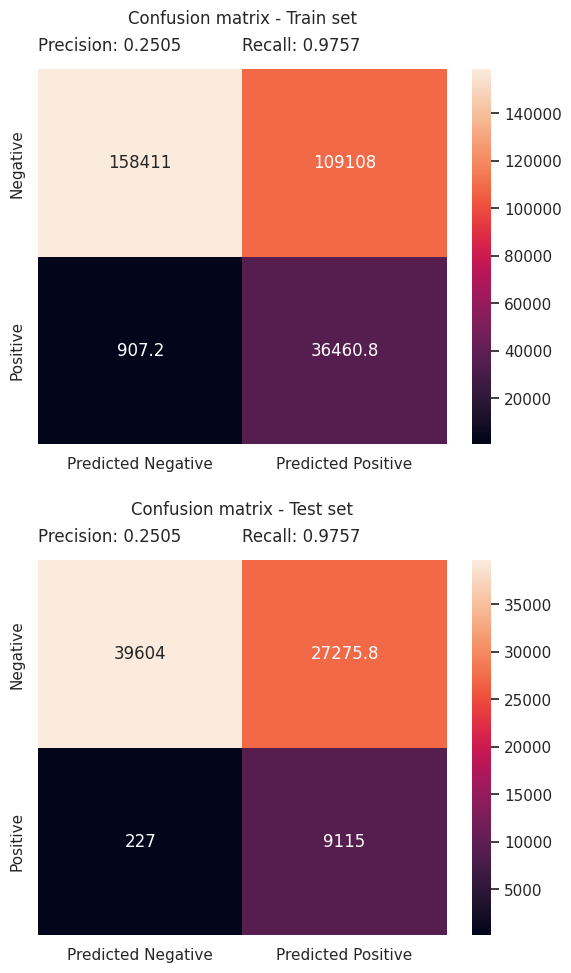

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

plt.subplot(2, 1, 1)
plot_confusion_matrix(mean_train_conf_matrix)
plt.title("Confusion matrix - Train set", y=1.1)

plt.subplot(2, 1, 2)
plot_confusion_matrix(mean_test_conf_matrix)
plt.title("Confusion matrix - Test set", y=1.1)

plt.subplots_adjust(hspace=-0.4)

plt.tight_layout()
plt.show()

Grazie all'uso dell'heatmap è possibile subito notare come i falsi negativi siano in numero molto ridotto non solo osservando il conteggio delle previsioni negative che sono in realtà positive (227 nel test set) ma anche osservando il colore scuro della casella che corrisponde ai valori più bassi della legenda sulla destra.

### Mod3: curva ROC

La **receiver operating characteristic curve (ROC)** è un grafico che permette di verificare le performance di un modello di classificazione per diversi valori di threshold. Tale grafico ha il true positive rate TPR (corrispondente alla recall) sull'asse delle y e il false positive rate FPR (corrispondente al complementare della specificità) sull'asse delle x. L'**area under the ROC curve (AUC)** invece, permette di dare un valore numerico alla curva ROC. Per ottenere la curva ROC del *mod3* è possibile utilizzare sempre il solito ciclo di cross-validation ricavando questa volta, per ogni fold, le previsioni della classe positiva sul test set sotto forma di probabilità con *predict_proba* e il TPR e il FPR su molteplici threshold con la funzione *roc-curve* di scikit-learn. Allo stesso modo per ogni fold viene ricavato il valore di AUC tramite la funzione *auc*. I TPR e FPR vengono interpolati su una griglia 100x100 e una volta terminato il ciclo, vengono calcolate le loro medie per ciascun threshold e la media degli AUC e viene mandata a schermo la ROC curve.

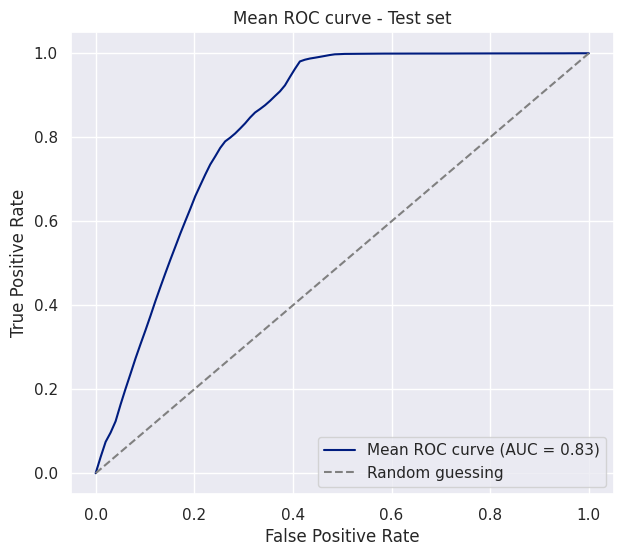

In [ ]:
all_tpr = []
all_fpr = []
all_auc = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LogisticRegression(class_weight="balanced", random_state=42)
    lr.fit(X_train, y_train)

    y_proba_test = lr.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba_test)
    all_tpr.append(np.interp(np.linspace(0, 1, 100), fpr, tpr))
    all_fpr.append(np.linspace(0, 1, 100))

    roc_auc = auc(fpr, tpr)
    all_auc.append(roc_auc)

mean_tpr = np.mean(all_tpr, axis=0)
mean_auc = np.mean(all_auc)

plt.figure(figsize=(7, 6))
plt.plot(all_fpr[0], mean_tpr, color="b", label=f"Mean ROC curve (AUC = {mean_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random guessing")
plt.title("Mean ROC curve - Test set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

La curva ROC media del *mod3* ha un'area sotto la curva pari a 0.83 (1 è il valore massimo) e si trova sempre molto al di sopra della linea di riferimento diagonale che rappresenta le prestazioni di un classificatore casuale (AUC=0.5). Il modello, dunque, ha delle prestazioni buone al variare dei threshold, in particolar modo al di sopra del threshold utilizzato, pari a 0.5, il TPR è sempre vicino ad 1, confermando le analisi precedenti e il raggiungimento degli obiettivi.